# $\Omega h^2$ for $\chi\chi\to h_2 h_2$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [5]:
# Read the file with the good DM points
xd2 = pd.read_csv('DM2.csv')
del[xd2['Unnamed: 0']]

In [4]:
#Sum
xd2['BRS'] = xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3+xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3\
+xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3+xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3+xd2.BRxx2e1Nu1\
+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3+xd2.BRx1x1h1h1+xd2.BRx1x1h2h2+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww\
+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww  

/usr/local/lib/python3.4/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


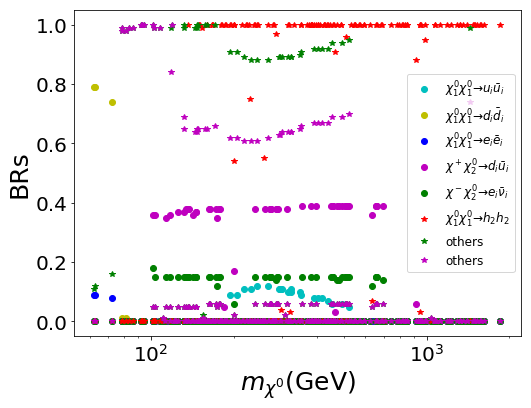

In [6]:
plt.figure(figsize=(8,6))
plt.semilogx(xd2.mChi1, (xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3)/100.,'co',label=r'$\chi_1^0\chi_1^0\to u_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3)/100.,'yo',label=r'$\chi_1^0\chi_1^0\to d_i\bar{d}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3)/100.,'bo',label=r'$\chi_1^0\chi_1^0\to e_i\bar{e}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'mo',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'go',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

plt.semilogx(xd2.mChi1, xd2.BRx1x1h2h2/100.,'r*',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1h1h1+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww)/100.,'g*',label=r'others')
plt.semilogx(xd2.mChi1, (xd2.BRxxww+xd2.BRx2x2ww+xd2.BRx1x1ww+xd2.BRx1x1ZZ)/100.,'m*',label=r'others')
#plt.semilogx(xd2.mChi1, xd2.BRS/100.,'k*',label=r'$\Sigma$')
plt.legend(prop={'size':12},loc='best')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'BRs',size=25)
plt.show()

In [7]:
h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >90., xd2.mChi1>xd2.mh2)]

h2 = h2.reset_index()
del[h2['index']]

In [8]:
print(xd2.shape[0], h2.shape[0])

284 100


# P-wave $\langle \sigma v\rangle$

\begin{equation}
\sigma v_r \approx \dfrac{h_c^4 (Z^H_{11})^4\sqrt{1-\mu^2}(9-8\mu^2+2\mu^4) }{48 \pi\, m_{\chi}^2 (2-\mu^2)^4} \color{red}{v_r^2} = b \color{red}{v_r^2} \to 
\langle\sigma v_r\rangle \approx \dfrac{h_c^4 (Z^H_{11})^4\sqrt{1-\mu^2}(9-8\mu^2+2\mu^4) }{48 \pi\, m_{\chi}^2 (2-\mu^2)^4} \color{red}{\dfrac{6}{x_f} }
\end{equation}

\begin{equation}
\mu = \dfrac{m_{h2}}{m_{\chi_1^0}}
\end{equation}

Conversion factor:
$3\times 10^{-26} cm^2/s \approx 2.541 \times 10^{-9} GeV^{-2}$

http://www.saha.ac.in/theory/palashbaran.pal/conv.html

In [12]:
6.58/(1.98**3)

0.8476768501255798

In [13]:
3*0.847

2.541

In [14]:
def sigmav(hc,ZH,u,m,xf):
    conver = 3.*10**(-26)/(2.541*10**(-9))
    siv = hc**4*ZH**4*np.sqrt(1.-u**2)*(9.-8.*u**2+2.*u**4)/(48.*np.pi*m**2*(2.-u**2)**4)*(6./xf)*conver
    return siv

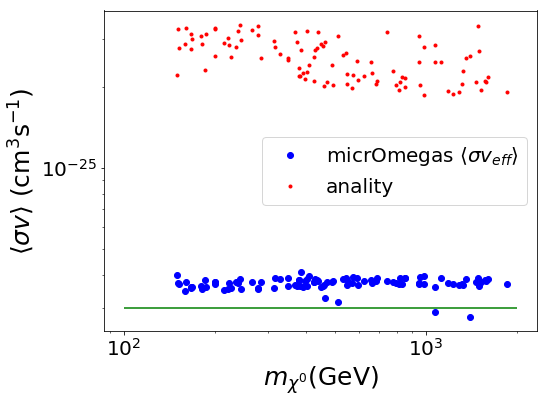

In [66]:
#Add to the DataFrame
h2['sv_fr_ana'] = sigmav(h2.YRC,h2.ZH11,(h2.mh2/h2.mChi1),h2.mChi1,h2.Xf)

plt.figure(figsize=(8,6))
plt.loglog(h2.mChi1 , h2.vsigmaeff, 'bo',label=r'micrOmegas $\langle\sigma v_{eff}\rangle$')
plt.loglog(h2.mChi1 , h2.sv_fr_ana, 'r.',label=r'anality')

plt.hlines(3.e-26,1e2,2e3, 'g')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend()

plt.tight_layout()
plt.show()

Ok. Near to $3\times 10^{-26}$ WIMP miracle

# Relic Density $\Omega h^2$

\begin{equation}
\Omega h^2 = \dfrac{0.876\times 10^{-10}x_f}{\sqrt{g^{*}}}\dfrac{1}{\langle \sigma v_r\rangle}\to
\dfrac{0.876\times 10^{-10}x_f}{\sqrt{g^{*}}}\dfrac{1}{\left(a+\dfrac{3b}{x_f}+\cdots\right)}
\end{equation}

Conversion factor:
$3\times 10^{-26} cm^2/s \approx 2.54 \times 10^{-9} GeV^{-2}$

Mplanck $= 1.22091 \times 10^{19}$ GeV  (micrOmegas)

\begin{equation}
g^* \approx 97(\text{SM}_{(T\approx 4000\, \text{MeV})}) + 1*(1(S)+0*(\sigma_1)+0(\sigma_2)) + \dfrac{7}{8}(4(\chi_1) + 0(\chi_2) + 0(\chi^+) + 2(\nu_R)) = 103.2
\end{equation}

In [67]:
1.04/1.22091

0.8518236397441253

In [76]:
conver = 3.*10**(-26)/(2.541*10**(-9))

h2['Omega_ana'] = 2.*0.876*1.0e-10*h2.Xf/np.sqrt(103.2)*1./(h2.sv_fr_ana/conver)

h2['Omega_anaeff'] = 2.*0.876*1.e-10*h2.Xf/np.sqrt(103.2)*1./(h2.vsigmaeff/conver)

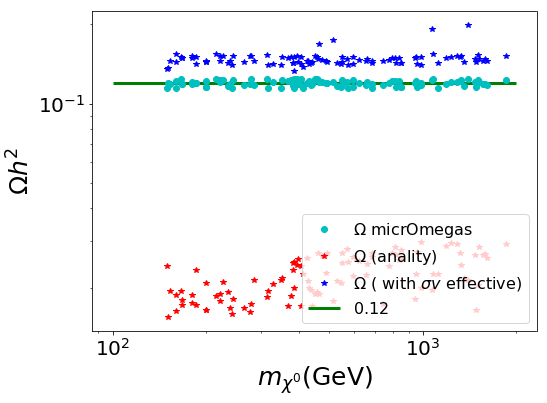

In [77]:
plt.figure(figsize=(8,6))

plt.hlines(0.12, 1e2, 2e3, 'g',lw=3,label=r'$0.12$')
plt.loglog(h2.mChi1, h2.Omega, 'co',label=r'$\Omega$ micrOmegas')
plt.loglog(h2.mChi1, h2.Omega_ana, 'r*',label=r'$\Omega$ (anality)')
plt.loglog(h2.mChi1, h2.Omega_anaeff, 'b*',label=r'$\Omega$ ( with $\sigma v$ effective)')

plt.legend(prop={'size':16},loc='lower right')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
#plt.ylim(0.04, 0.2)

plt.tight_layout()
#plt.savefig('plots/xxtoh2h2-OMEGA.pdf')
plt.show()

In [16]:
h2[['mh1','mh2','mChi1','mChi2','mCha','mS1','mS2','Xf']][:3]

,mh1,mh2,mChi1,mChi2,mCha,mS1,mS2,Xf
0,124.861005,174.167281,199.735482,1679.44400,1679.44400,14563.98310,14563.98310,26.5
1,124.861776,150.087491,180.038336,929.00905,929.00888,1582.59388,1582.59388,26.5
2,124.861902,144.424791,160.189384,5163.27883,5163.21440,1322.75894,1322.75894,26.4
